In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import pandas as pd
import os

# Using a raw string for the file path
file_path = r'C:\Users\gurmo\Downloads\LHL_Final_Capstone_Project\data\credit_card_india.csv'

# Check if the file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print("File not found:", file_path)


In [3]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df["Date"]=pd.to_datetime(df["Date"])
df.dtypes

index                 int64
City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

In [5]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [6]:
p_card =df["Card Type"].value_counts()
p_card

Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: Card Type, dtype: int64

Q1. Which card type is most popular ?

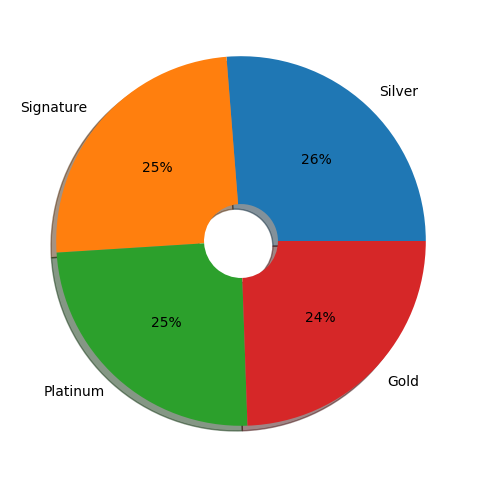

In [7]:
plt.figure(figsize=(6,6))
l=["Silver","Signature","Platinum","Gold"]
plt.pie(p_card,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 10},wedgeprops={"width":0.8})
plt.show()

Q2. Which expense type is most popular ?

In [8]:
p_exp = df['Exp Type'].value_counts()
p_exp

Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: Exp Type, dtype: int64

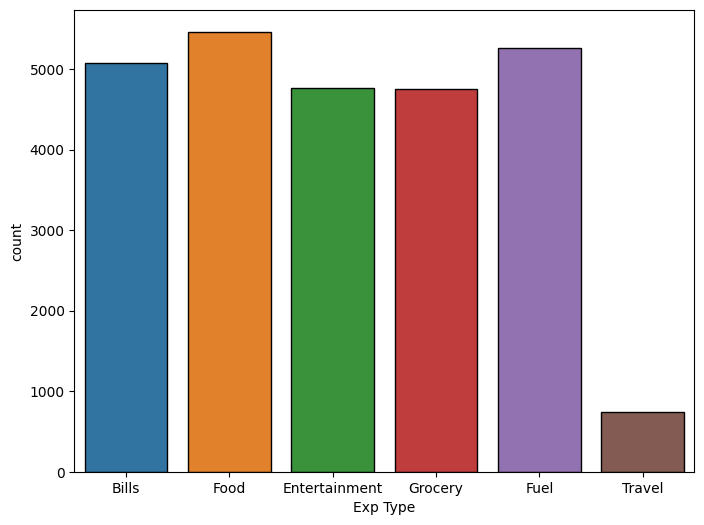

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x ="Exp Type",data=df,edgecolor="black")
plt.show()

Q3. Which gender spend more in Credit Card?

In [10]:
m_gen = df["Gender"].value_counts()
m_gen

F    13680
M    12372
Name: Gender, dtype: int64

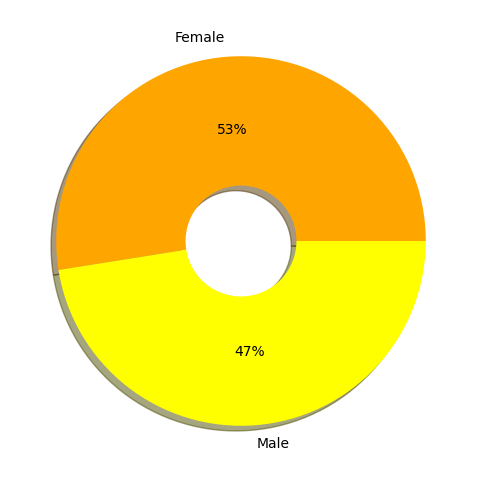

In [11]:
plt.figure(figsize=(6,6))
gen = ["Female","Male"]
plt.pie(m_gen,labels=gen,shadow=True,autopct="%0.0f%%",textprops={"fontsize":10},colors=["orange","yellow"],wedgeprops={'width': 0.7})
plt.show()

Q4. In which month of the year credit card usage is the highest.

In [12]:
df["Month"] = df["Date"].dt.month_name()
p_mnth = df["Month"].value_counts()
p_mnth 

January      2722
December     2702
October      2665
March        2622
November     2622
April        2587
May          2436
February     2433
August       1393
September    1321
July         1310
June         1239
Name: Month, dtype: int64

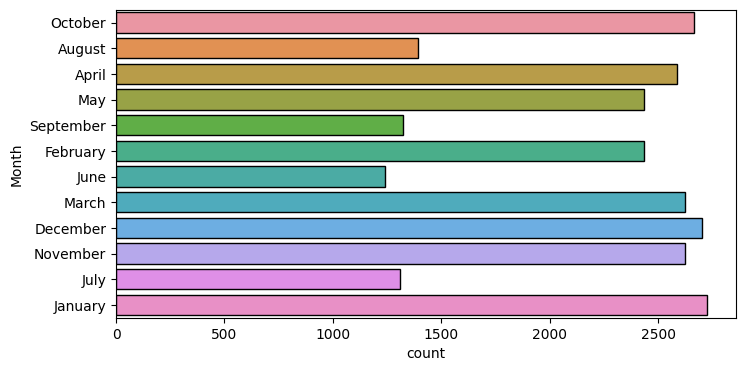

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(y="Month",data=df,edgecolor="black")
plt.show()

<Figure size 1000x800 with 0 Axes>

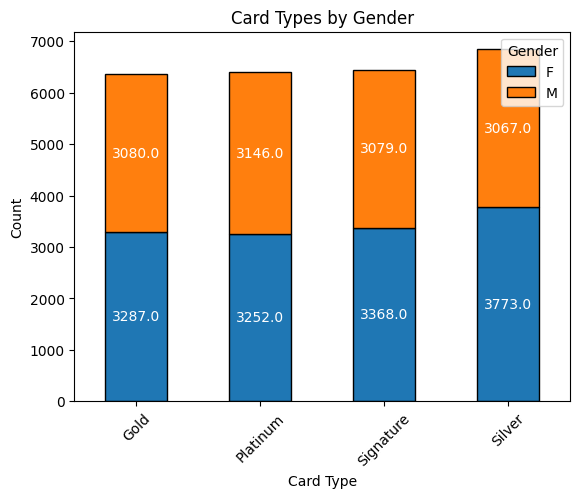

In [14]:
# Plot Stacked Bar Chart of Card Types by Gender

# Cross-tabulate Card Type and Gender
ct = pd.crosstab(df['Card Type'], df['Gender'])

plt.figure(figsize=(10, 8))
ax = ct.plot(kind='bar', stacked=True, edgecolor='k')

# Add the count values on top of each segment of the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(i.get_height()), 
            fontsize=10, color='white', ha='center', va='center')

plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Types by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

Total Amount Spent by Gender:
Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64


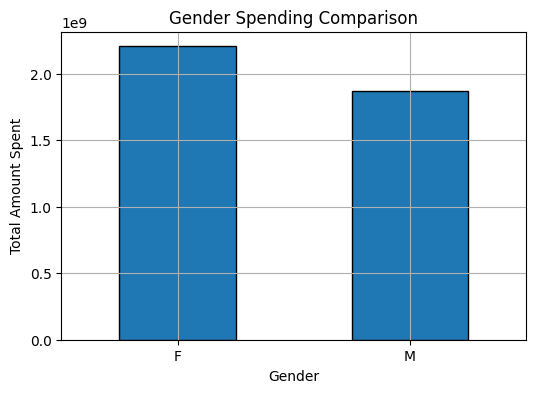

In [15]:
grouped_by_gender = df.groupby('Gender')['Amount'].sum()

# Displaying the total amount spent by each gender
print("Total Amount Spent by Gender:")
print(grouped_by_gender)

# Plotting the gender spending comparison as a bar plot
plt.figure(figsize=(6, 4))
grouped_by_gender.plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Gender Spending Comparison')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Top Spending Categories:
Exp Type
Bills            907072473
Food             824724009
Fuel             789135821
Entertainment    726437536
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64


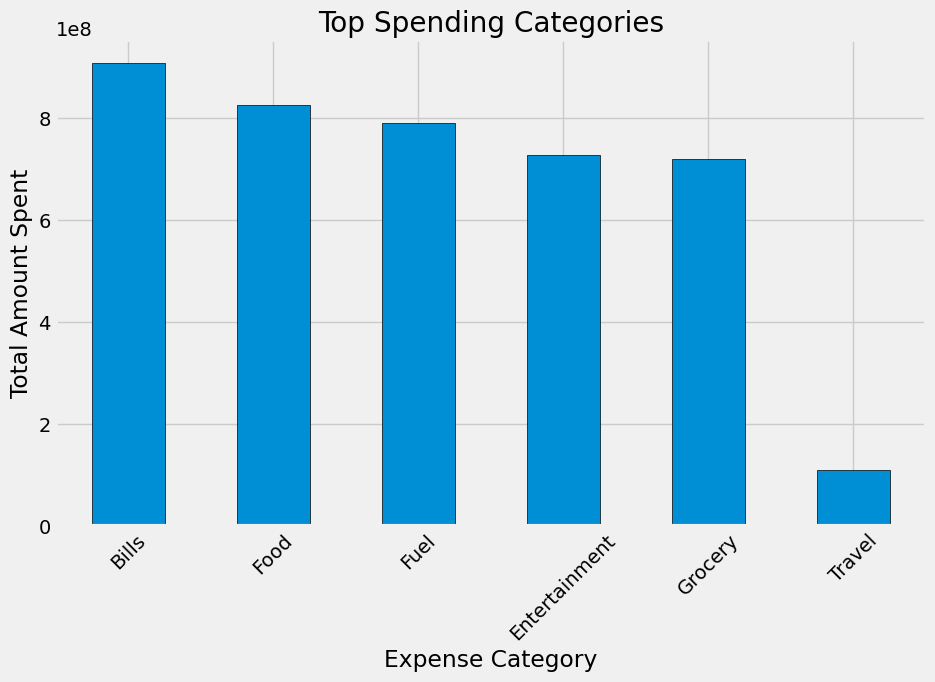

In [17]:
# bar plot for top spending Expense Category

grouped_by_expense_type = df.groupby('Exp Type')['Amount'].sum()
top_spending_categories = grouped_by_expense_type.sort_values(ascending=False)

# Displaying the top spending categories
print("Top Spending Categories:")
print(top_spending_categories)

# Plotting the top spending categories as a bar plot
plt.figure(figsize=(10, 6))
top_spending_categories.plot(kind='bar', edgecolor='k')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount Spent')
plt.title('Top Spending Categories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

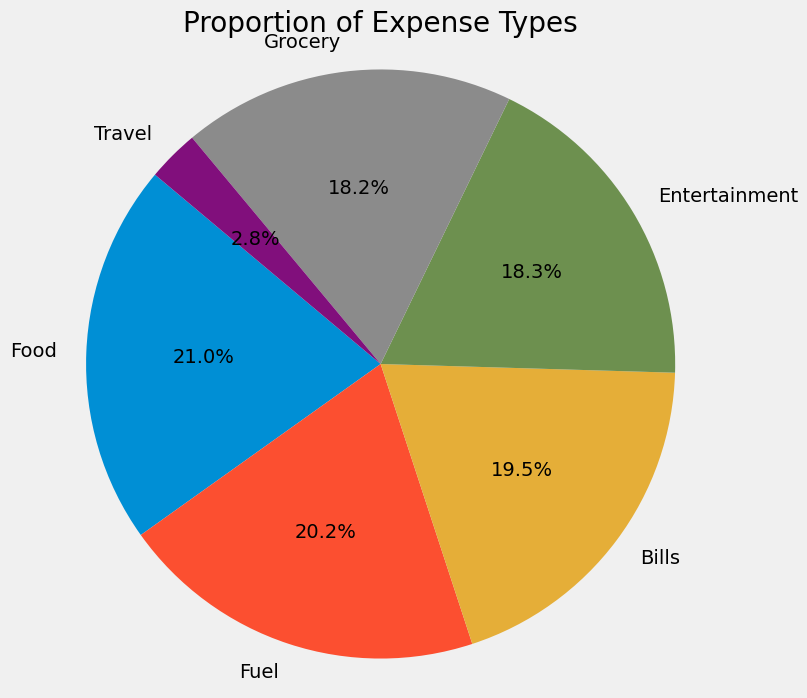

In [18]:
# pie chart for card types ( percent of occurrences )

# Count the occurrences of each expense type
expense_type_counts = df['Exp Type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(expense_type_counts.values, labels=expense_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Expense Types')
plt.show()

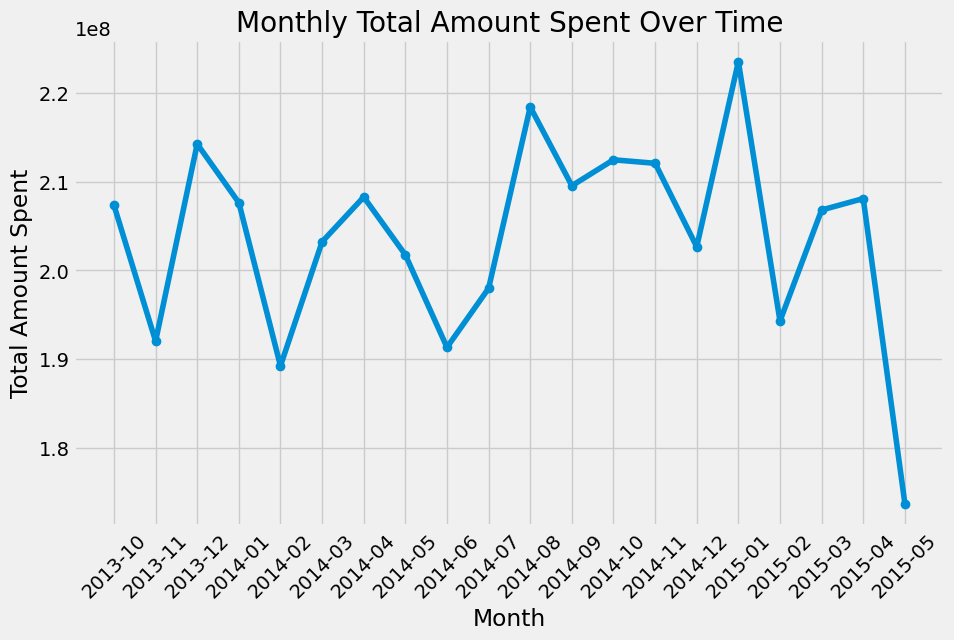

In [19]:
# line chart for total amount spent each Month
monthly_spending = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

# Convert the PeriodIndex to string format for plotting
monthly_spending.index = monthly_spending.index.astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_spending.index, monthly_spending.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.title('Monthly Total Amount Spent Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()